In [1]:
import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print("TensorFlow版本是:", tf.__version__)

TensorFlow版本是: 1.14.0


In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print('training data shape:', x_train.shape)
print('training labels shape:', y_train.shape)
print('test data shape:', x_test.shape)
print('test labels shape:', y_test.shape)

training data shape: (50000, 32, 32, 3)
training labels shape: (50000, 1)
test data shape: (10000, 32, 32, 3)
test labels shape: (10000, 1)


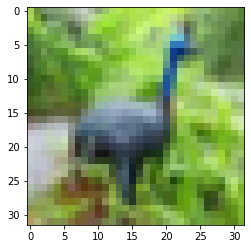

In [4]:
plt.imshow(x_train[6])

In [5]:
y_train[6]

array([2], dtype=uint8)

In [6]:
label_dict = {0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
              5:"dog",6:"frog",7:"horese",8:"ship",9:"trcuk"}

In [7]:
label_dict[y_train[6][0]]

'bird'

In [8]:
x_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [9]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

# 定义网络结构
## 建立卷积神经网络CNN模型

In [10]:
# 建立Sequentia线性堆叠模型
model = tf.keras.models.Sequential()
# 第1个卷积层
model.add(tf.keras.layers.Conv2D(filters = 32,
                                 kernel_size = (3,3),
                                 input_shape = (32, 32, 3),
                                 activation = 'relu',
                                 padding = 'same'))
# 防止过拟合
model.add(tf.keras.layers.Dropout(rate=0.3))
# 第1个池化层
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

In [11]:
# 第2个卷积层
model.add(tf.keras.layers.Conv2D(filters = 64,
                                 kernel_size = (3,3),
                                 activation = 'relu',
                                 padding = 'same'))
# 防止过拟合
model.add(tf.keras.layers.Dropout(rate=0.3))
# 第2个池化层
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# 平坦层
model.add(tf.keras.layers.Flatten())
# 添加输出层
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [13]:
train_epochs = 5
batch_size = 100

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 模型训练
### 训练模型

In [15]:
# 训练模型
train_history = model.fit(x_train, y_train,
                          validation_split=0.2,
                          epochs=train_epochs,
                          batch_size=batch_size,
                          verbose=2)

Train on 40000 samples, validate on 10000 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
40000/40000 - 22s - loss: 1.5492 - accuracy: 0.4487 - val_loss: 1.4261 - val_accuracy: 0.5692
Epoch 2/5
40000/40000 - 22s - loss: 1.2168 - accuracy: 0.5756 - val_loss: 1.2765 - val_accuracy: 0.6015
Epoch 3/5
40000/40000 - 22s - loss: 1.0822 - accuracy: 0.6256 - val_loss: 1.2060 - val_accuracy: 0.6231
Epoch 4/5
40000/40000 - 22s - loss: 1.0030 - accuracy: 0.6539 - val_loss: 1.1352 - val_accuracy: 0.6436
Epoch 5/5
40000/40000 - 23s - loss: 0.9485 - accuracy: 0.6722 - val_loss: 1.0985 - val_accuracy: 0.6439


In [16]:
def visu_train_history(train_history, train_metric, validation_metric):
    plt.plot(train_history.history[train_metric])
    plt.plot(train_history.history[validation_metric])
    plt.title('Train History')
    plt.ylabel(train_metric)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

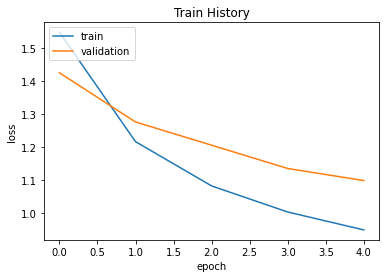

In [17]:
visu_train_history(train_history, 'loss', 'val_loss')

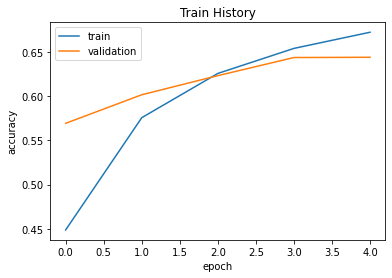

In [18]:
visu_train_history(train_history, 'accuracy', 'val_accuracy')

In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

10000/10000 - 1s - loss: 1.0921 - accuracy: 0.6450
Test accuracy: 0.645


In [20]:
preds = model.predict_classes(x_test)

In [21]:
preds

array([3, 8, 8, ..., 5, 1, 7])

In [22]:
def plot_images_labels_prediction(images,
                                  labels,
                                  preds,
                                  index,
                                  num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,6)
    if num > 10:
        num = 10
    for i in range(0,num):
        ax = plt.subplot(2,5,1+i)#获取当前要处理的子图
        ax.imshow(images[index],cmap = 'binary') #显示第index个图像
        
        title = str(index)+','+label_dict[labels[index][0]]
        if len(preds) > 0:
            title += '=>'+label_dict[preds[index]]
            
        ax.set_title(title,fontsize = 10)
        
        index+=1
    plt.show()

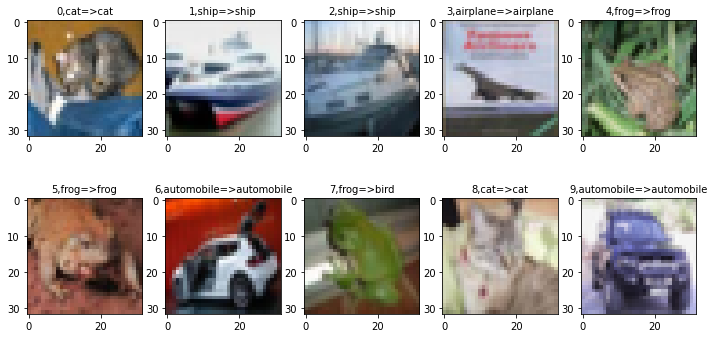

In [23]:
plot_images_labels_prediction(x_test, 
                              y_test,
                              preds, 0, 10)